In [1]:
import alborex_functions
import alborexdata
import netCDF4
import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np
import datetime
from importlib import reload

In [2]:
reload(alborexdata)

<module 'alborexdata' from '/home/ctroupin/Publis/201703_AlborexData/python/alborexdata.py'>

In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Configuration

Create a logger

In [4]:
logger = alborexdata.configure_logging("./logs/alborexFigure4.log")

Domain

In [5]:
coordinates = [-6.75, 3.001, 34.75, 40.]
coordinates2 = [-1, -0.25, 36.65, 37.25]

Create a list of netCDF files containing SST

In [9]:
figdir = "../figures/drifters/"
datadir = "/home/ctroupin/Data/Alborex/Gliders/"

In [11]:
coastfile = "../data/coastline_cartex_f3.txt"
datafilelist = sorted(glob.glob(os.path.join(datadir, '*L1*.nc')))
nfiles = len(datafilelist)
if nfiles == 0:
    logger.warning("No SST files in directory {0}".format(datadir))
else:
    logger.info("Working on {0} data files".format(nfiles))

2018-01-03 20:37:00,480 - alborex_logger - INFO - Working on 2 data files


# Data reading and plotting

Make figure directory if necessary.

In [8]:
if os.path.isdir(figdir):
    logger.debug("Figure directory {0} already exists".format(figdir))
else:
    os.makedirs(figdir)
    logger.debug("Creating figure directory {0}".format(figdir))

2018-01-03 20:12:45,999 - alborex_logger - DEBUG - Figure directory ../figures/drifters/ already exists


## Coastline

In [54]:
coastdir = '../data/'
coastfile = os.path.join(coastdir, 'coastline_cartex_f3.txt')

if os.path.exists(coastfile):
    logger.info("{0} exists".format(coastfile))
    loncoast, latcoast = alborexdata.read_lonlat_coast(coastfile)
else:
    logger.warning("{0} does't exist".format(coastfile))  

2018-01-03 22:02:16,919 - alborex_logger - INFO - ../data/coastline_cartex_f3.txt exists


Create the projection (only once)

In [55]:
m = Basemap(projection='merc', llcrnrlon=coordinates2[0], llcrnrlat=coordinates2[2],
            urcrnrlon=coordinates2[1], urcrnrlat=coordinates2[3],
            lat_ts=0.5 * (coordinates2[2] + coordinates2[3]), resolution='h')

## Loop on the files

In [56]:
figname = "glider_tracks"
figtitle = "Glider tracks"
logger.info("Making figure {0}".format(figname))

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax

# Add the coastline
for i in range(0, len(loncoast)):
    m.plot(np.array(loncoast[i]), np.array(latcoast[i]), 
           color='k', linewidth=.5, latlon=True)

alborexdata.add_map_grid(m, coordinates, dlon=2., dlat=2.,
                         fontname='Times New Roman', fontsize=14, 
                         linewidth=0.2, zorder=1, color=".6")
    
for datafiles in datafilelist:
    
    # logger.debug("Working on file: {0}".format(os.path.basename(datafiles)))
    
    # Read data from file
    glider = Glider()
    glider.get_from_netcdf(datafiles)
        
    # Remove masked values
    glider.remove_masked_coords()

    # Add to plot
    glider.point_plot(m, marker='.', linestyle=':',
                       color=".3", ms=.1, zorder=3)    
        
    if drifter.temperature is not None:
        # drifter.mask_temp(tmin, tmax)
        drifter.select_dates(finaldate=datetime.datetime(2014, 6, 1, 0, 0))
        scat = drifter.scatter_plot(m, vmin=tmin, vmax=tmax, s=3,
                                    cmap=plt.cm.RdYlBu_r, zorder=4)
    
cb = plt.colorbar(scat, extend='both', shrink=0.6)
cb.set_label('$^{\circ}$C', rotation=0, ha='left', fontsize=16)

xtext1, ytext1 = m(-3.2, 37.)
xfig1, yfig1 = m(coordinates2[0], coordinates2[2])

plt.title(figtitle, fontsize=20)
# plt.show()
plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches='tight',)
plt.close()

2018-01-03 22:02:25,407 - alborex_logger - INFO - Making figure glider_tracks


AttributeError: 'numpy.ndarray' object has no attribute 'compressed'

In [45]:
class Glider(alborexdata.Drifter):
    
    
    def remove_masked_coords(self):
        self.lon = self.lon.compressed()
        self.lat = self.lat.compressed()

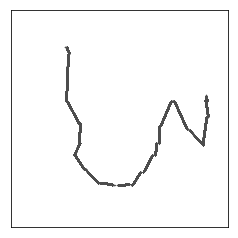

In [52]:
plt.figure()
gliderX.point_plot(m, marker='.', linestyle=':',
                   color=".3", ms=.1, zorder=3, alpha=.7)    
plt.show()
plt.close()